# Demand Forecasting - Random Forest and Decision Tree-Amazon UK Grocery Dataset

## Project Introduction: Machine Learning (ML):

This project, along with its counterparts in Data Visualization and Artificial Neural Networks (ANN) on the same dataset, forms part of a portfolio hosted on GitHub, intended to showcase proficiency and expertise in various data science domains. Each project stands alone, allowing audience to assess skills independently, while also providing links to related projects for a holistic view of capabilities. In this phase of our project, we will dive into machine learning (ML) to develop predictive models aimed at forecasting demand based on the features of our comprehensive Amazon UK Grocery Dataset.

*Data Visualization Project:* https://github.com/sumit-biswas-uk/Amazon-UK-Grocery-Dataset---Data-Visualization-Project

*Artificial Neural Network (ANN) Project:* https://github.com/sumit-biswas-uk/Amazon-UK-Grocery-Dataset-Artificial-Neural-Network-ANN-Project



**Project Overview:**

* **Exploratory Data Analysis (EDA) and Data Visualization:** We'll start by exploring the dataset. We'll dive into its structure, and derive insights into the relationships between various variables. This includes understanding how features relate to one another, as well as their correlation with the target variables—sales. Moreover, we'll analyse the distribution of data within both features and target variables. This preliminary investigation serves a dual purpose: identifying crucial features that influence demand generation (and can be used for our ML) and guiding our strategies for data imputation and scaling.

* **Data Cleaning and Preprocessing:** We'll start by cleaning and preparing the dataset for our ML. This includes selecting only relevant columns for our ML, converting Date Parsed column to numerical format, handling missing data, splitting the data into training and testing sets and scaling the data.

* **Feature Engineering:** Before training our models, we will conduct feature engineering to ensure the dataset is compatible with the ML algorithms. This might involve various tasks such as handling categorical variables, encoding them into numerical format using techniques like one-hot encoding, and preparing the features for input into the models.

* **Model Selection:** For demand prediction, I opted to implement two widely used machine learning algorithms: Decision Tree and Random Forest. Decision Tree offer interpretability and simplicity, making them suitable for understanding the underlying patterns in the data. On the other hand, Random Forest leverages ensemble learning to enhance prediction accuracy by aggregating the results of multiple decision trees.

* **Model Training:** Instead of traditional random data splits, we will adopt a temporal partitioning approach. I will arrange the dataset in ascending order by date, using data from January 2006 till November 2020 (all rows except last 1000) for training and data from November 2020 till November 2021 for testing (last 1000 rows). This approach mimics real-life scenarios, where historical data is used to predict future outcomes. By training our models on historical data and testing them on "future" data, we aim to evaluate their predictive capabilities accurately.

* **Model Evaluation:** After training our models, we will evaluate their performance using various evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE) and R-squared score. These metrics provide insights into the accuracy and generalization capabilities of our models. Additionally, we will conduct a K-Fold Cross Validation and Grid Search to optimize the hyperparameters of our model.

* **Hyperparameter Tuning:** Hyperparameters play a crucial role in determining the performance of our models. To optimize predictive accuracy, we will fine-tune the hyperparameters using Grid Search. Grid Search allows us to exhaustively search through a predefined set of hyperparameters and identify the combination that yields the best performance based on the evaluation metrics.

* **Implementation:**

  Python serves as the primary programming language for implementing our ML models. We will leverage popular libraries such as Scikit-Learn for model development and evaluation. The code is accompanied by detailed explanations to facilitate understanding and reproducibility.

* **Expected Outcomes:**

  By the conclusion of this phase, I expect to have robust ML models capable of accurately predicting demand for Amazon UK Grocery as a whole. These models will serve as valuable tools for market analysis, strategic planning, and decision-making processes.

**Download Dataset here:** https://www.kaggle.com/datasets/dalmacyali1905/amazon-uk-grocery-dataset-unsupervised-learning

## About the Dataset:

**Overview:**

This dataset provides a comprehensive overview of various Amazon grocery products. It captures vital statistics such as sales figures, revenue, ratings, and other essential metrics. This data was collected using the Helium10 tool.

**Key Features:**

Product Details: A description of the grocery product.

ASIN: Amazon Standard Identification Number.

Brand: Brand of the product.

Price: Price of the product.

Sales: Number of units sold.

Revenue: Total revenue generated from the product.

BSR: Best Seller Rank on Amazon.

FBA Fees: Fulfilment By Amazon fees.

Active Sellers #: Number of active sellers for the product.

Ratings: Average customer rating.

Review Count: Number of customer reviews.

Images: Number of product images available.

Review velocity: The number of reviews added in a specified time frame.

Buy Box: The seller who currently has the "Buy Box" for the product.

Category: The category of the product on Amazon (e.g., Food Cupboard, Drinks).

Size Tier: Size classification for the product.

Delivery: Delivery method.

Dimensions: Product dimensions (Length x Width x Height).

Weight: Weight of the product.

Creation Date: The date when the product was added to Amazon.

**Usage:**

This dataset can be used for various purposes, including:

Market analysis for grocery products on Amazon.

Brand comparison based on sales, reviews, and ratings.

Predictive modelling for sales or revenue.

Analysing the relationship between price, sales, and reviews.

Understanding the importance of product images in sales.

**Acknowledgments:**

Data was collected using the Helium10 tool.

## Importing Libraries

Here, we import necessary libraries such as NumPy, Pandas, Seaborn, Matplotlib, and Scikit-Learn for data visualization and manipulation. We also import FuzzyWuzzy for string matching.

In [ ]:
! pip install fuzzywuzzy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import fuzzywuzzy
from fuzzywuzzy import process
from matplotlib.ticker import EngFormatter

## Mounting Google drive and then loading the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/All Data/dataset.csv'

amazon_dataset_raw = pd.read_csv(file_path, delimiter=',')

amazon_dataset_raw.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Product Details,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers #,Ratings,Review Count,Images,Review velocity,Buy Box,Category,Size Tier,Delivery,Dimensions,Weight,Creation Date
0,Lindt Lindor Milk Chocolate Truffles Box - The...,B00NW479QO,Lindt,3.50,13466.0,47131.0,3.0,2.62,30.0,5.0,44069.0,12.0,868.0,Amazon,Food Cupboard,Small Oversize,AMZ,4.2x6.3x3.1,0.51,9/26/2014
1,Andrex Toilet Roll - Gentle Clean Toilet Paper...,B004OCO20E,Andrex,18.28,13338.0,243819.0,2.0,8.38,30.0,5.0,40397.0,5.0,830.0,Amazon,Grocery,Large Oversize,AMZ,13.5x21.8x13.0,9.77,2/17/2011
2,Baileys Original Irish Cream Liqueur 1L,B0049NYI7K,BAILEYS,9.99,11194.0,111828.0,4.0,3.93,22.0,5.0,3827.0,6.0,235.0,Amazon,"Beer, Wine & Spirits",Large Oversize,AMZ,3.7x12.2x3.7,3.73,10/21/2010
3,Tassimo Kenco Americano Grande Coffee Pods (Pa...,B016DEGFWI,Tassimo,14.87,13492.0,200626.0,2.0,5.19,11.0,5.0,28800.0,5.0,466.0,Amazon,Fresh & Chilled,Large Oversize,AMZ,6.8x15.5x6.2,3.26,8/4/2010
4,Tassimo Costa Gingerbread Latte Coffee Pods (P...,B07JVF2FCV,Tassimo,45.00,13377.0,601965.0,6.0,11.03,1.0,5.0,27494.0,9.0,223.0,Bountyville,Drinks,Large Oversize,FBA,6.7x15.4x6.1,4.74,9/3/2018


## Exploratory Data Analysis (EDA)
Checking Dataset Information.

In [ ]:
amazon_dataset_raw.shape

(6341, 20)

We have 6341 rows and 20 columns.

In [ ]:
amazon_dataset_raw.columns

Index(['Product Details', 'ASIN', 'Brand', 'Price', 'Sales', 'Revenue', 'BSR',
       'FBA Fees', 'Active Sellers #', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Buy Box', 'Category', 'Size Tier', 'Delivery',
       'Dimensions', 'Weight', 'Creation Date'],
      dtype='object')

Above are our features and target variable (Sales).

We will now proceed to understand the data types of each column and see if we need to change any datatype for our purpose of Machine Learning and for our future purpose of Artificial Neural Network.

In [ ]:
amazon_dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Details   6341 non-null   object 
 1   ASIN              6341 non-null   object 
 2   Brand             6324 non-null   object 
 3   Price             5077 non-null   float64
 4   Sales             4539 non-null   float64
 5   Revenue           4830 non-null   float64
 6   BSR               5888 non-null   float64
 7   FBA Fees          3705 non-null   float64
 8   Active Sellers #  6290 non-null   float64
 9   Ratings           5513 non-null   float64
 10  Review Count      5513 non-null   float64
 11  Images            5849 non-null   float64
 12  Review velocity   6291 non-null   float64
 13  Buy Box           4409 non-null   object 
 14  Category          6341 non-null   object 
 15  Size Tier         4812 non-null   object 
 16  Delivery          5252 non-null   object 


From above we see that all the data types are almost correct, and we need to change only one. Columns like Price, Sales, Revenue, BSR, FBA Fee, Active Sellers, Ratings, Review Count, Images, Review Velocity and Weight are numerical, and the others are object, and that's what we want. However, the Creation Date column is an object and we want it to be a date time. We will tackle this later in the project.

Now we will proceed to find out if there are any empty cells or cells with NaN values.

In [ ]:
amazon_dataset_raw.isnull().sum()

Product Details        0
ASIN                   0
Brand                 17
Price               1264
Sales               1802
Revenue             1511
BSR                  453
FBA Fees            2636
Active Sellers #      51
Ratings              828
Review Count         828
Images               492
Review velocity       50
Buy Box             1932
Category               0
Size Tier           1529
Delivery            1089
Dimensions          1516
Weight              1437
Creation Date          1
dtype: int64

We see that the dataset has a lot of empty cells and cells with NaN values. To get a better picture we will create a function to give us the percentage of empty cells and cells with NaN values for each column.

In [ ]:
def percent_null(column):
  '''
  Iterate through every column to get
  the percentage of empty cells or cells with NaN values
  of each column or just pass one column to get percentage
  for that column.
  '''
  total_cells = np.prod(column.shape)
  missing_values = column.isnull().sum()

  percent_null = (missing_values / total_cells) *100

  return percent_null


In [ ]:
# Iterating through all the columns to get the percentage for each
# column by applying the function above (percent_null).
for column in amazon_dataset_raw.columns:
  percent_null_value = percent_null(amazon_dataset_raw[column])
  print(f"{column}:{percent_null_value:.2f}%")


Product Details:0.00%
ASIN:0.00%
Brand:0.27%
Price:19.93%
Sales:28.42%
Revenue:23.83%
BSR:7.14%
FBA Fees:41.57%
Active Sellers #:0.80%
Ratings:13.06%
Review Count:13.06%
Images:7.76%
Review velocity:0.79%
Buy Box:30.47%
Category:0.00%
Size Tier:24.11%
Delivery:17.17%
Dimensions:23.91%
Weight:22.66%
Creation Date:0.02%


We see that a big part of our dataset has missing values. Specifically, the columns we will use for the purpose of this project and future project. For example: Sales and Revenue has close to or over 25% of data missing. FBA fees has over 41% of data missing and Weight has over 23% of data missing. Although there is missing data in almost every column, these are few examples of columns which we will potentially use in our projects.

Later we will discuss how we tackle this missing data. We might end up dropping some columns (like FBA Fee: as it might have a high correlation with price) for our ML and ANN projects or impute the missing data with mean, median or mode (depending on their distribution and type of data)

Now we will try and understand how many unique brands are present in our Brands column. This is done to get an idea if there are high number of spelling mistakes when entering data into this column. This will later help us understand if we will be able to use this column in our ML and ANN models with One-Hot Encoding.

In [ ]:
unique_brands = amazon_dataset_raw['Brand'].unique()
unique_brands

array(['Lindt', 'Andrex', 'BAILEYS', ..., 'García DE LA cruz 1872',
       'Kent Crisps Limited', 'Sonneveld'], dtype=object)

In [ ]:
len(unique_brands) # Checking the length of unique brands.

1566

In [ ]:
amazon_dataset_raw['Brand'].nunique() # Checking number of unique entries.

1565

In [ ]:
amazon_dataset_raw['Brand'].isnull().sum() # Checking for number of NaN or empty cells in Brand column.

17

We see a very high number of unique entries in the Brand column which might be an indication of lot of spelling mistakes and errors while entering the brands. We also find that there are 17 missing or NaN entries in this column.

Next, we will try and understand the BSR column. We will see the minimum and the maximum ratings.

In [ ]:
amazon_dataset_raw['BSR'].min()

0.0

In [ ]:
amazon_dataset_raw['BSR'].max()

4405945.0

We see that the max rating is 4405945 which is a very high number. To make sure we actually have this high rating number, we will cross check by arranging the BSR column in descending order.

In [ ]:
bsr_decending = amazon_dataset_raw['BSR'].sort_values(ascending=False)
bsr_decending

5532    4405945.0
5531    4294882.0
5528    4071419.0
5526    3717946.0
5524    3278284.0
          ...    
6173          NaN
6199          NaN
6211          NaN
6229          NaN
6246          NaN
Name: BSR, Length: 6341, dtype: float64

We see that indeed the max rating is a very high number.

## Data Visualization

### Understanding Trends

We will now go ahead and understand sales trends for Amazon UK Grocery as a whole.

To accomplish this, we'll need to perform some pre-data cleaning. The creation date is currently stored as an object type, as we observed earlier. Therefore, we'll create a new column with datetime object type to facilitate our analysis.

In [ ]:
# Creating a new column with dates parsed.
amazon_dataset_raw['Date Parsed'] = pd.to_datetime(amazon_dataset_raw['Creation Date'], format='%m/%d/%Y')
amazon_dataset_raw.head()

,Product Details,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers #,Ratings,...,Images,Review velocity,Buy Box,Category,Size Tier,Delivery,Dimensions,Weight,Creation Date,Date Parsed
0,Lindt Lindor Milk Chocolate Truffles Box - The...,B00NW479QO,Lindt,3.50,13466.0,47131.0,3.0,2.62,30.0,5.0,...,12.0,868.0,Amazon,Food Cupboard,Small Oversize,AMZ,4.2x6.3x3.1,0.51,9/26/2014,2014-09-26
1,Andrex Toilet Roll - Gentle Clean Toilet Paper...,B004OCO20E,Andrex,18.28,13338.0,243819.0,2.0,8.38,30.0,5.0,...,5.0,830.0,Amazon,Grocery,Large Oversize,AMZ,13.5x21.8x13.0,9.77,2/17/2011,2011-02-17
2,Baileys Original Irish Cream Liqueur 1L,B0049NYI7K,BAILEYS,9.99,11194.0,111828.0,4.0,3.93,22.0,5.0,...,6.0,235.0,Amazon,"Beer, Wine & Spirits",Large Oversize,AMZ,3.7x12.2x3.7,3.73,10/21/2010,2010-10-21
3,Tassimo Kenco Americano Grande Coffee Pods (Pa...,B016DEGFWI,Tassimo,14.87,13492.0,200626.0,2.0,5.19,11.0,5.0,...,5.0,466.0,Amazon,Fresh & Chilled,Large Oversize,AMZ,6.8x15.5x6.2,3.26,8/4/2010,2010-08-04
4,Tassimo Costa Gingerbread Latte Coffee Pods (P...,B07JVF2FCV,Tassimo,45.00,13377.0,601965.0,6.0,11.03,1.0,5.0,...,9.0,223.0,Bountyville,Drinks,Large Oversize,FBA,6.7x15.4x6.1,4.74,9/3/2018,2018-09-03


In [ ]:
# Selecting the Revenue and Date Parsed column and arranging the data in ascending order according to Date Parsed column.
amazon_grocery_timeline = amazon_dataset_raw[['Sales', 'Date Parsed']].sort_values('Date Parsed')
amazon_grocery_timeline

,Sales,Date Parsed
14,13216.0,2006-01-01
45,17196.0,2006-01-01
108,17196.0,2006-01-01
3161,2133.0,2006-08-31
3192,547.0,2006-08-31
...,...,...
3995,NaN,2021-11-12
3282,NaN,2021-11-12
389,11.0,2021-11-18
3778,NaN,2021-11-18


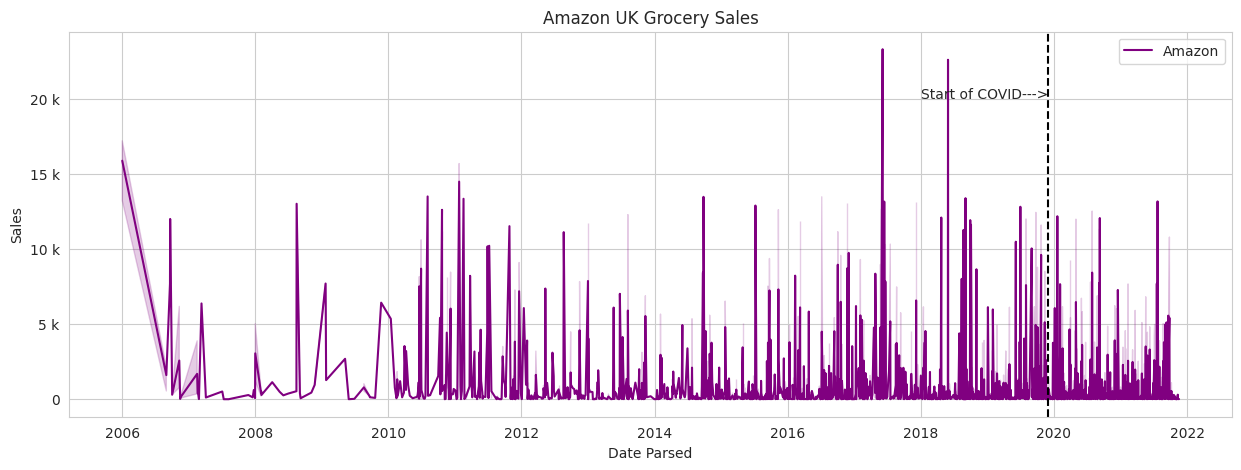

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,5))

fmt = EngFormatter(places=0) # Creating an instance in EngFormatter with 0 decimal places.
# Plotting the data on a line graph.
sns.lineplot(x=amazon_dataset_raw['Date Parsed'], y=amazon_dataset_raw['Sales'], data=amazon_grocery_timeline, label='Amazon', color='Purple')
ax.yaxis.set_major_formatter(fmt) # Using EngFormatter on y axis to get the numbers in thousands.
ax.axvline(18231, c='black', ls='--') # Drawing a vertical line at the start of COVID (by using time since epoc: 01/01/1970).
ax.text(17532, 20000, "Start of COVID--->") # Providing descriptive text to the vertical line.
ax.set_title('Amazon UK Grocery Sales') # Setting plot title.
plt.tight_layout

plt.show()


When we observe the sales timeline of Amazon UK Grocery as a whole, we uncover some intriguing observations.

The most apparent observation is the significant fluctuations in Amazon UK Grocery's overall sales performance, characterized by large jumps and drops over time.

A rather surprising revelation in this chart, however, is the spikes observed between 2011 and 2012, as well as around 2018 and the beginning of 2019. Of particular interest is the spike just before the onset of COVID-19, which is twice as high as the post-COVID sales.

Considering the surge in the online shopping market space post-COVID, with every online merchant capitalizing on this trend, including Amazon, the significant spike just before the pandemic is unexpected. While Amazon has undoubtedly experienced significant sales growth and profitability post-COVID, as evident from news reports, the pre-COVID spike needs further investigation.

We have already dived deeper into exploring the reasons behind this pre-COVID spike in Data Visualization project (link provided above).

### Understanding Relationships

In this section, we'll create scatterplots to explore the relationships between several features (many of which we'll utilize in our ML and ANN models), and our target variable (sales). Additionally, we'll generate a heatmap to gain insight into the correlation between these features as well as their correlations with our target variable.

Our hypothesis is that features such as Images, Ratings, Review Count, and Review Velocity may exhibit some degree of correlation with sales.

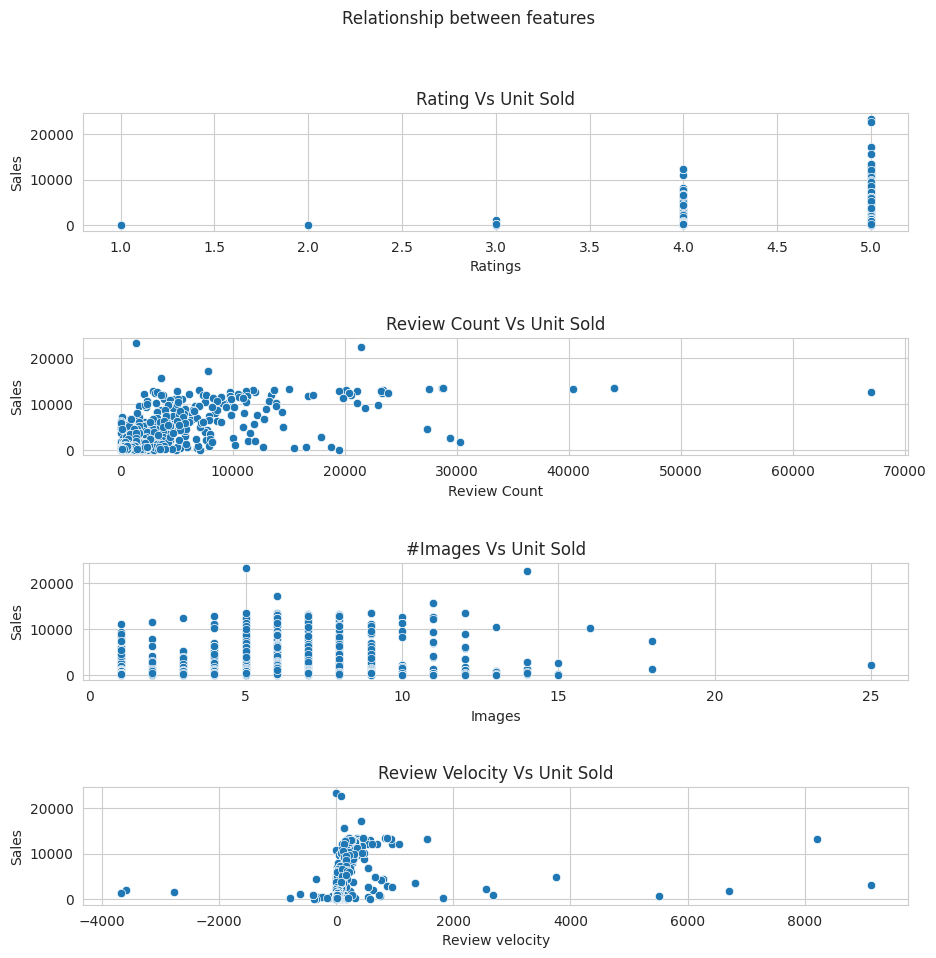

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
fig.suptitle('Relationship between features') # Setting figure title.

# Plotting our data on scatterplot.
sns.scatterplot(x=amazon_dataset_raw['Ratings'], y=amazon_dataset_raw['Sales'], data=amazon_dataset_raw, ax=ax[0])
ax[0].set_title('Rating Vs Unit Sold') # Setting plot title.

# Plotting our data on scatterplot.
sns.scatterplot(x=amazon_dataset_raw['Review Count'], y=amazon_dataset_raw['Sales'], data=amazon_dataset_raw, ax=ax[1])
ax[1].set_title('Review Count Vs Unit Sold') # Setting plot title.

# Plotting our data on scatterplot.
sns.scatterplot(x=amazon_dataset_raw['Images'], y=amazon_dataset_raw['Sales'], data=amazon_dataset_raw, ax=ax[2])
ax[2].set_title('#Images Vs Unit Sold') # Setting plot title.

# Plotting our data on scatterplot.
sns.scatterplot(x=amazon_dataset_raw['Review velocity'], y=amazon_dataset_raw['Sales'], data=amazon_dataset_raw, ax=ax[3])
ax[3].set_title('Review Velocity Vs Unit Sold') # Setting plot title.

plt.tight_layout(pad=3) # Adjusting the padding around the plots for better visibility.
plt.show()

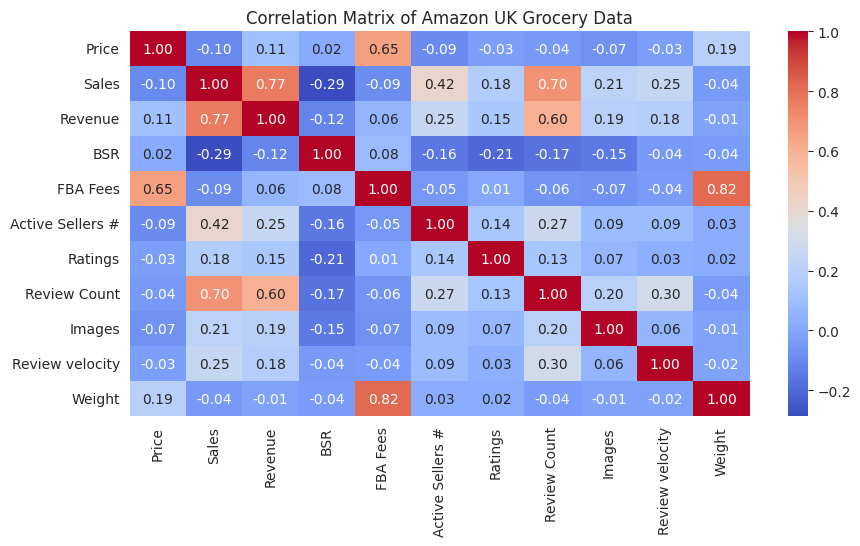

In [ ]:
numeric_df = amazon_dataset_raw.select_dtypes(include=[np.number])  # Select only numeric columns.
corr = numeric_df.corr()  # Calculating correlation.

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm") # Creating a Heatmap.
plt.title('Correlation Matrix of Amazon UK Grocery Data') # Setting plot title.
plt.show()

Upon plotting the relationships between the features and target variables, as well as generating the heatmap, we observe the following:

* Review count exhibits a high correlation with our target variable, which is promising.

* Images and the target variable do not demonstrate a very high correlation.

* Rating and the target variable also do not exhibit a very high correlation.

* Review Velocity and the target variable likewise do not show very high correlation.

* Additionally, we have noticed that none of our features have a linear relationship with our target variable except Ratings.

We also observe that certain features have obvious high correlations with each other, which may lead to overfitting when training our ML or ANN models:

* FBA fee and price are highly correlated.

* FBA fee and weight are highly correlated.

We will proceed to clean the data and reevaluate these correlations with cleaned data. Subsequently, we will devise strategies to address the issue of high correlations among features in our ML or ANN models.

### Distributions

In this section, we will examine the distribution of our features and target variable. This analysis will provide us with further insights into the data and help us understand the appropriate strategy to use when filling missing data as well as scaling the data when building a ML or ANN models.

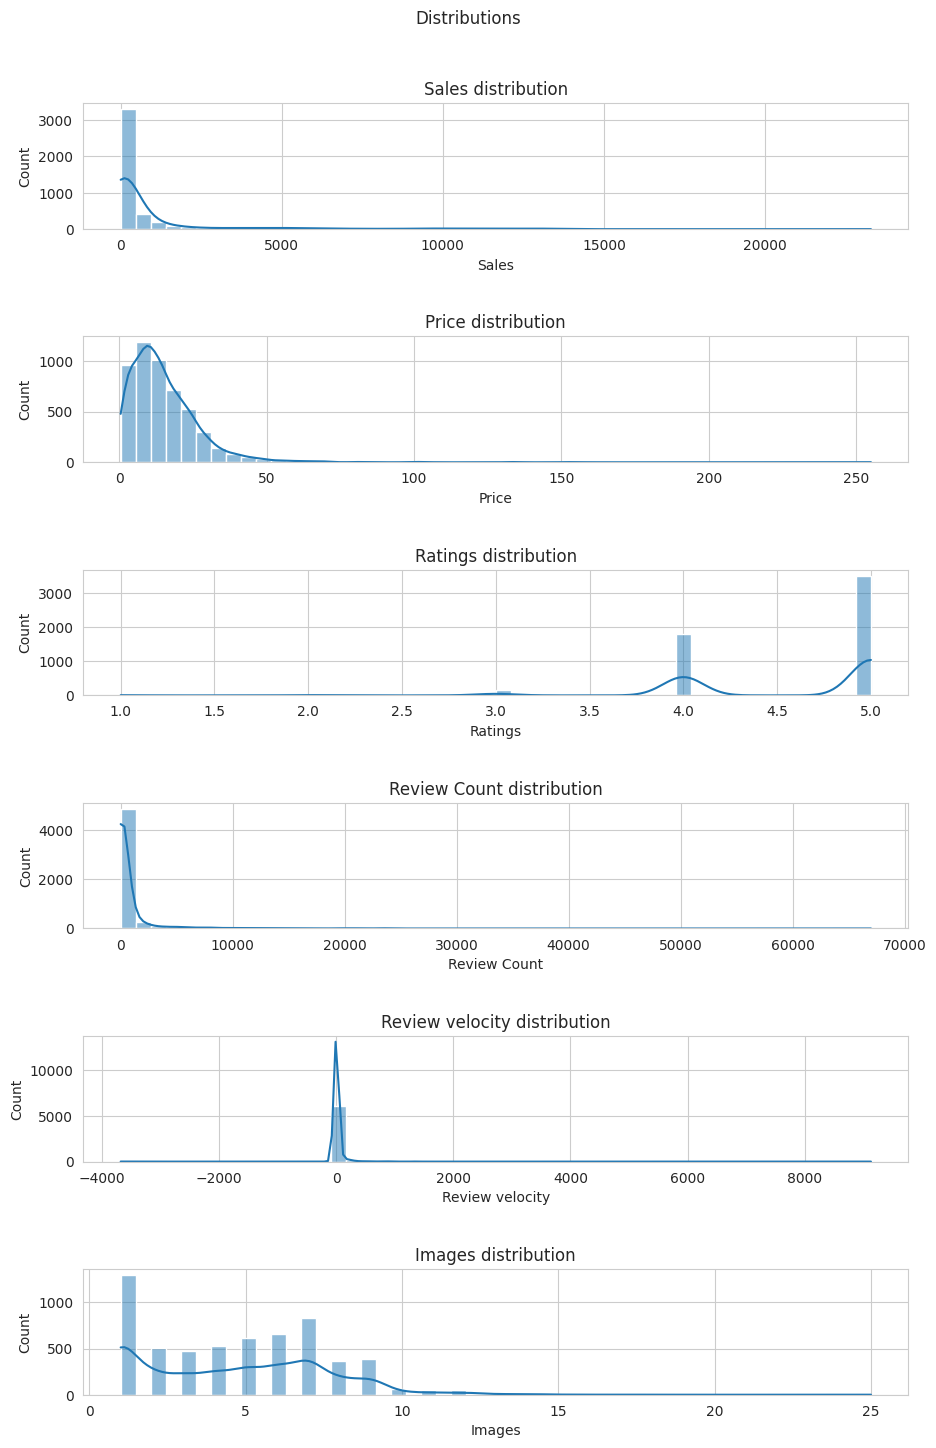

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(6, 1, figsize=(10, 15))
fig.suptitle('Distributions') # Setting plot title.

# We will iterate through the relevant columns to plot their distributions on separate graphs.
for index, column in enumerate(amazon_dataset_raw[['Sales', 'Price', 'Ratings', 'Review Count', 'Review velocity', 'Images']]):
  # Plotting our column in iteration on a histplot along with kde plot.
  sns.histplot(x=amazon_dataset_raw[column], ax=ax[index], kde=True, bins=50)
  ax[index].set_title(f"{column} distribution") # Setting plot title.

plt.tight_layout(pad=3) # Adjusting the padding around the plots for better visibility.
plt.show()


From the distribution graphs above, we can derive the following conclusions:

* Sales for the majority of observations falls around 1000 units.

* The price of most products is around £10.

* Ratings for most observations are between 4 and 5.

* Review count for most observations is under 1000.

* The review velocities of most observations are around -50 to 100.

* The number of images for most observations ranges from 1 to 2.

Most importantly, we observe that none of the distribution graphs exhibit a bell curve shape; instead, they are skewed. Therefore, when replacing missing data for numerical columns, we will use the median (rather than the mean) to make our model less sensitive to outliers. Additionally, we will use a RobustScaler (rather than StandardScaler or MinMaxScaler) to scale our data in ML and ANN models, to reduce sensitivity to outliers.

## Data Cleaning

Now we will proceed with data cleaning. First, we will look at the columns again and decide which columns to keep and which ones to drop.

In [ ]:
amazon_dataset_raw.columns

Index(['Product Details', 'ASIN', 'Brand', 'Price', 'Sales', 'Revenue', 'BSR',
       'FBA Fees', 'Active Sellers #', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Buy Box', 'Category', 'Size Tier', 'Delivery',
       'Dimensions', 'Weight', 'Creation Date', 'Date Parsed'],
      dtype='object')

We see that for our ML and ANN models, we do not need Product Details, Buy Box, Size Tier, Delivery, Dimensions, and Creation Date (as we have Date Parsed column). So, I will only select the columns except the ones above.

In [ ]:
amazon_dataset_clean = amazon_dataset_raw[['ASIN', 'Brand', 'Price', 'Sales', 'Revenue', 'BSR',
       'FBA Fees', 'Active Sellers #', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Category', 'Weight',
       'Date Parsed']]

amazon_dataset_clean

,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers #,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed
0,B00NW479QO,Lindt,3.50,13466.0,47131.0,3.0,2.62,30.0,5.0,44069.0,12.0,868.0,Food Cupboard,0.51,2014-09-26
1,B004OCO20E,Andrex,18.28,13338.0,243819.0,2.0,8.38,30.0,5.0,40397.0,5.0,830.0,Grocery,9.77,2011-02-17
2,B0049NYI7K,BAILEYS,9.99,11194.0,111828.0,4.0,3.93,22.0,5.0,3827.0,6.0,235.0,"Beer, Wine & Spirits",3.73,2010-10-21
3,B016DEGFWI,Tassimo,14.87,13492.0,200626.0,2.0,5.19,11.0,5.0,28800.0,5.0,466.0,Fresh & Chilled,3.26,2010-08-04
4,B07JVF2FCV,Tassimo,45.00,13377.0,601965.0,6.0,11.03,1.0,5.0,27494.0,9.0,223.0,Drinks,4.74,2018-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336,B089H2CBKP,García DE LA cruz 1872,17.50,162.0,2835.0,6418.0,6.82,1.0,5.0,530.0,4.0,2.0,Food Cupboard,4.23,2020-07-16
6337,B075WX3V4F,Tree of Life,4.84,931.0,4506.0,7297.0,2.89,1.0,5.0,562.0,6.0,15.0,Food Cupboard,1.68,2017-09-24
6338,B011A1FZJI,Kent Crisps Limited,13.93,122.0,1699.0,6486.0,6.27,1.0,5.0,228.0,1.0,1.0,Food Cupboard,5.03,2015-07-01
6339,B0013GAEII,Biona,2.85,208.0,593.0,7443.0,2.73,7.0,4.0,260.0,7.0,0.0,Food Cupboard,1.81,2008-02-02


I will rename the Active Sellers column from Active Sellers  # to Active Sellers as it was bugging me :).

In [ ]:
amazon_dataset_clean.rename(columns={'Active Sellers #': 'Active Sellers'}, inplace=True)
amazon_dataset_clean

<ipython-input-41-31a869f00e12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_dataset_clean.rename(columns={'Active Sellers #': 'Active Sellers'}, inplace=True)


,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed
0,B00NW479QO,Lindt,3.50,13466.0,47131.0,3.0,2.62,30.0,5.0,44069.0,12.0,868.0,Food Cupboard,0.51,2014-09-26
1,B004OCO20E,Andrex,18.28,13338.0,243819.0,2.0,8.38,30.0,5.0,40397.0,5.0,830.0,Grocery,9.77,2011-02-17
2,B0049NYI7K,BAILEYS,9.99,11194.0,111828.0,4.0,3.93,22.0,5.0,3827.0,6.0,235.0,"Beer, Wine & Spirits",3.73,2010-10-21
3,B016DEGFWI,Tassimo,14.87,13492.0,200626.0,2.0,5.19,11.0,5.0,28800.0,5.0,466.0,Fresh & Chilled,3.26,2010-08-04
4,B07JVF2FCV,Tassimo,45.00,13377.0,601965.0,6.0,11.03,1.0,5.0,27494.0,9.0,223.0,Drinks,4.74,2018-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336,B089H2CBKP,García DE LA cruz 1872,17.50,162.0,2835.0,6418.0,6.82,1.0,5.0,530.0,4.0,2.0,Food Cupboard,4.23,2020-07-16
6337,B075WX3V4F,Tree of Life,4.84,931.0,4506.0,7297.0,2.89,1.0,5.0,562.0,6.0,15.0,Food Cupboard,1.68,2017-09-24
6338,B011A1FZJI,Kent Crisps Limited,13.93,122.0,1699.0,6486.0,6.27,1.0,5.0,228.0,1.0,1.0,Food Cupboard,5.03,2015-07-01
6339,B0013GAEII,Biona,2.85,208.0,593.0,7443.0,2.73,7.0,4.0,260.0,7.0,0.0,Food Cupboard,1.81,2008-02-02


We will again find out the number and percentage of NaN values and empty cells in our clean dataframe.

In [ ]:
amazon_dataset_clean.isnull().sum()

ASIN                  0
Brand                17
Price              1264
Sales              1802
Revenue            1511
BSR                 453
FBA Fees           2636
Active Sellers       51
Ratings             828
Review Count        828
Images              492
Review velocity      50
Category              0
Weight             1437
Date Parsed           1
dtype: int64

In [ ]:
# Using the percent_null function created above to
# get the percentage of cells with NaN values or empty cells in each column.
for column in amazon_dataset_clean.columns:
  percent_null_value = percent_null(amazon_dataset_clean[column])
  print(f"{column}: {percent_null_value:.2f}%")

ASIN: 0.00%
Brand: 0.27%
Price: 19.93%
Sales: 28.42%
Revenue: 23.83%
BSR: 7.14%
FBA Fees: 41.57%
Active Sellers: 0.80%
Ratings: 13.06%
Review Count: 13.06%
Images: 7.76%
Review velocity: 0.79%
Category: 0.00%
Weight: 22.66%
Date Parsed: 0.02%


In [ ]:
amazon_dataset_clean.isna().sum()

ASIN                  0
Brand                17
Price              1264
Sales              1802
Revenue            1511
BSR                 453
FBA Fees           2636
Active Sellers       51
Ratings             828
Review Count        828
Images              492
Review velocity      50
Category              0
Weight             1437
Date Parsed           1
dtype: int64

We will also find out if there are any cells with just whitespaces.

In [ ]:
blanks = []

# Using itertuples(), it returns a tuple with the index as the first element,
# followed by the row values in following indexes.
# Iterate through each row using itertuples.
for row in amazon_dataset_clean.itertuples():
    # Iterate through each cell in the row.
    for cell in row[1:]:  # Skip the first element which is the index.
        if str(cell).isspace():  # Convert cell to string and check if it contains only whitespace.
            blanks.append(row.Index)  # Append index of the row with whitespace to the blanks list.

print(blanks)  # Printing the results to see all index position which has whitespaces.

[]


We see that there are no cells with whitespaces.

We will find out the data types of each column again.

In [ ]:
amazon_dataset_clean.dtypes

ASIN                       object
Brand                      object
Price                     float64
Sales                     float64
Revenue                   float64
BSR                       float64
FBA Fees                  float64
Active Sellers            float64
Ratings                   float64
Review Count              float64
Images                    float64
Review velocity           float64
Category                   object
Weight                    float64
Date Parsed        datetime64[ns]
dtype: object

We now see that we have correct data types for all columns including the Date Parsed as datetime.

In [ ]:
amazon_dataset_clean.columns

Index(['ASIN', 'Brand', 'Price', 'Sales', 'Revenue', 'BSR', 'FBA Fees',
       'Active Sellers', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Category', 'Weight', 'Date Parsed'],
      dtype='object')

We also see that we have all relevant columns now in our clean dataframe.

### Handling Missing Data

As we saw earlier that the distribution of our numeric data is skewed, we will use median to fill the missing data for numerical column.

We will also use mode (most frequent) for our object columns.

We will use SimpleImputer to impute these columns.

In [ ]:
median_imputer = SimpleImputer(strategy='median') # Creating an instance in SimpleImputer for median.
mode_imputer = SimpleImputer(strategy='most_frequent') # Creating and instance in SimpleImputer for mode.

columns_impute_median = ['Price', 'Sales', 'Revenue', 'BSR', 'FBA Fees',
       'Active Sellers', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Weight']
columns_impute_mode = ['Brand', 'Date Parsed']

amazon_dataset_clean[columns_impute_median] = median_imputer.fit_transform(amazon_dataset_clean[columns_impute_median]) # Fitting our numerical data into median_imputer.
amazon_dataset_clean[columns_impute_mode] = mode_imputer.fit_transform(amazon_dataset_clean[columns_impute_mode]) # Fitting our non numeric data into our mode_imputer.

amazon_dataset_clean.isnull().sum()

<ipython-input-48-13d14109dd38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_dataset_clean[columns_impute_median] = median_imputer.fit_transform(amazon_dataset_clean[columns_impute_median]) # Fitting our numerical data into median_imputer.
<ipython-input-48-13d14109dd38>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_dataset_clean[columns_impute_mode] = mode_imputer.fit_transform(amazon_dataset_clean[columns_impute_mode]) # Fitting our non numeric data into our mode_imputer.


ASIN               0
Brand              0
Price              0
Sales              0
Revenue            0
BSR                0
FBA Fees           0
Active Sellers     0
Ratings            0
Review Count       0
Images             0
Review velocity    0
Category           0
Weight             0
Date Parsed        0
dtype: int64

In [ ]:
amazon_dataset_clean.isna().sum()

ASIN               0
Brand              0
Price              0
Sales              0
Revenue            0
BSR                0
FBA Fees           0
Active Sellers     0
Ratings            0
Review Count       0
Images             0
Review velocity    0
Category           0
Weight             0
Date Parsed        0
dtype: int64

After filling the missing data, we now see that we do not have any empty cells or cells with NaN values in our clean dataframe.

### String Matching

In this section, we will focus on the "Brand" column and assess how much data cleaning is required, or if we can utilize this column in our ML and ANN models at all.

The determining factor for incorporating this feature in ML and ANN models is the number of categories. Since we will need to perform One-Hot Encoding on this column (if we decide to use it), we must ensure that the number of categories after cleaning the data is not excessively high. Having a high number of categories with One-Hot Encoding could introduce unnecessary complexity to the ML and ANN models (overfitting) without significantly enhancing their predictive capabilities.

In [ ]:
brands = amazon_dataset_clean['Brand'].unique()
brands

array(['Lindt', 'Andrex', 'BAILEYS', ..., 'García DE LA cruz 1872',
       'Kent Crisps Limited', 'Sonneveld'], dtype=object)

Stripping the string (brand names) of spaces and converting them into lower case.

In [ ]:
amazon_dataset_clean['Brand'] = amazon_dataset_clean['Brand'].str.lower()
amazon_dataset_clean['Brand'] = amazon_dataset_clean['Brand'].str.strip()

<ipython-input-51-2b7a38a6aa18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_dataset_clean['Brand'] = amazon_dataset_clean['Brand'].str.lower()
<ipython-input-51-2b7a38a6aa18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_dataset_clean['Brand'] = amazon_dataset_clean['Brand'].str.strip()


Now that we have stripped the strings of the brand names, of spaces and converted them into lower case, we will create a function to match each string with every other string and store the matches in close matches provided that the match percentage is over 90%. We will use Fuzzywuzzy for this.

In [ ]:
def get_matches(df, column, min_ratio=90):
    '''
    Pass the dataset and the relevant column as argument
    to match a string with every other string in the column to
    find close matches (over 90%)
    '''
    strings = df[column].unique() # Getting unique strings from the specified column of the DataFrame

    # Iterating through unique strings.
    for i in strings:
        # Find matches for the current string against all other strings using token set ratio.
        matches = fuzzywuzzy.process.extract(i, strings, scorer=fuzzywuzzy.fuzz.token_set_ratio)
        # Filter matches based on minimum ratio and excluding the current string in iteration.
        close_matches = [match for match in matches if match[1] >= min_ratio and match[0] != i]
        # If close matches (over 90%) were found, we will print the current string in iteration
        # and iterate through close matches to print the close match and the ratio of match.
        if close_matches:
            print(f"Close matches for '{i}':")
            for match in close_matches:
                print(f"- {match[0]} (Match Ratio: {match[1]})")

In [ ]:
matches = get_matches(df=amazon_dataset_clean, column='Brand') # Finding matches in Brand column through the function created above.
matches

Close matches for 'lindt':
- lindt sprungli (Match Ratio: 100)
Close matches for 'pukka herbs':
- pukka (Match Ratio: 100)
Close matches for 'comfort':
- alo comfort (Match Ratio: 100)
Close matches for 'lavazza':
- lavazza a modo mio (Match Ratio: 100)
Close matches for 'presto!':
- presto (Match Ratio: 100)
Close matches for 'monin':
- monin smoothie (Match Ratio: 100)
Close matches for 'yorkshire tea':
- tea+ (Match Ratio: 100)
Close matches for 'dolce gusto':
- nescafé dolce gusto (Match Ratio: 100)
- dolce gusto by nescafé (Match Ratio: 100)
Close matches for 'twinings':
- itc & twinings (Match Ratio: 100)
- tisgood4u,twinings (Match Ratio: 100)
- twinings super blends (Match Ratio: 100)
- twinings. (Match Ratio: 100)
Close matches for 'nescafé':
- nescafé dolce gusto (Match Ratio: 100)
- nescafé gold (Match Ratio: 100)
- nescafé original (Match Ratio: 100)
- dolce gusto by nescafé (Match Ratio: 100)
Close matches for 'fever-tree':
- fever tree (Match Ratio: 100)
Close matches for

Close matches for '""':
- ''' (Match Ratio: 100)
Close matches for 'beanies':
- beanies the flavour co (Match Ratio: 100)
- beanies flavoured coffeee (Match Ratio: 100)
Close matches for 'whittard of chelsea':
- whittard (Match Ratio: 100)
Close matches for 'tilz':
- tilz gear (Match Ratio: 100)
Close matches for 'beanies flavoured coffeee':
- beanies (Match Ratio: 100)
Close matches for 'tilz gear':
- tilz (Match Ratio: 100)
Close matches for 'raven café':
- raven cafe (Match Ratio: 95)
Close matches for 'coffee shop collection':
- coffee (Match Ratio: 100)
Close matches for 'coffee world':
- coffee (Match Ratio: 100)
Close matches for 'pact coffee':
- coffee (Match Ratio: 100)
Close matches for 'always looking good':
- good good (Match Ratio: 100)
Close matches for 'kahwati speciality coffee':
- coffee (Match Ratio: 100)
Close matches for 'discover coffee':
- coffee (Match Ratio: 100)
Close matches for 'quirky coffee co':
- coffee (Match Ratio: 100)
Close matches for 'hay hamper':
- 

Close matches for 'luxury hamper gift company':
- luxury hamper gift box company (Match Ratio: 100)
Close matches for ''''':
- "" (Match Ratio: 100)
Close matches for 'luxury hamper gift box company':
- luxury hamper gift company (Match Ratio: 100)
Close matches for 'freshground':
- fg freshground (Match Ratio: 100)
Close matches for 'kimbo caffe':
- kimbo (Match Ratio: 100)
Close matches for 'solo coffee':
- coffee (Match Ratio: 100)
Close matches for 'kuka coffee':
- coffee (Match Ratio: 100)
Close matches for 'califia farms':
- califia (Match Ratio: 100)
- califa farms (Match Ratio: 96)
Close matches for 'califia':
- califia farms (Match Ratio: 100)
Close matches for 'point blank cold brew ltd':
- point blank (Match Ratio: 100)
Close matches for 'point blank':
- point blank cold brew ltd (Match Ratio: 100)
Close matches for 'union brew lab':
- union (Match Ratio: 100)
- brew lab (Match Ratio: 100)
Close matches for 'far side coffee':
- coffee (Match Ratio: 100)
Close matches for 'br


From the analysis above, it's evident that there are no spelling mistakes in the brand names, but there are numerous instances where a particular brand name has been entered in different ways. Here are a few examples of brand names that are the same but have been entered differently:

* Pukka Herbs and Pukka
* Comfort and Alo Comfort
* Presto! and Presto
* Dolce Gusto and Nescafé Dolce Gusto, and so on.

Cleaning and rectifying these entries may not be necessary for this project due to a couple of reasons:

* There are a high number of instances where this has occurred, therefore cleaning these would be impractical for purpose of ML and ANN models.

* Even after cleaning this, we will still end up with a high number of categories, which we won't be able to use in ML and ANN models as it will surely result in overfitting.

## Understanding Correlations: (after data cleaning)

Now that we have cleaned the data, we will reevaluate the correlations between the numeric features and target variables. This analysis will help us understand which features to retain and which ones to drop. Our objectives are:

* Determine if there are high correlations among features. If so, we will devise a strategy to either combine them or drop redundant ones.

* Assess the correlation between the features and the target variables.

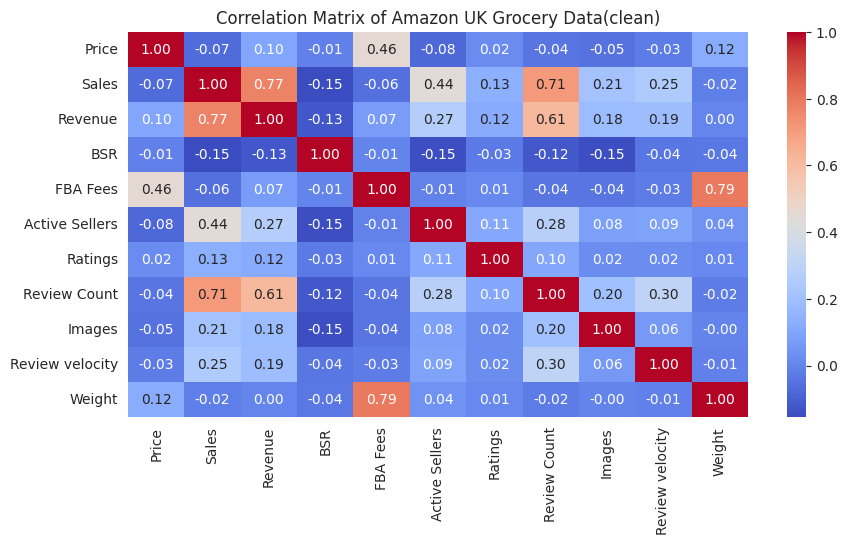

In [ ]:
numeric_df = amazon_dataset_clean.select_dtypes(include=[np.number])  # Select only numeric columns.
corr = numeric_df.corr()  # Calculating correlation.

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm") # Creating a Heatmap.
plt.title('Correlation Matrix of Amazon UK Grocery Data(clean)') # Setting plot title.
plt.show()


From the analysis above, we observe the following:

* Review count still exhibits a high correlation with our target variables, which is positive.

* The correlation between Images and the target variables has decreased after cleaning the data.

* Similarly, the correlation between Rating and the target variables has also decreased after data cleaning.

* The correlation between Review Velocity and the target variables has slightly decreased after data cleaning.

Additionally, we note that the following features still exhibit high correlation with each other, which may lead to overfitting when training our ML or ANN models:

* FBA fee and Weight are highly correlated.

However, there is an improvement in the correlation between FBA fee and price, which is now at acceptable levels (under 50%).

## Data Preprocessing

Following the data cleaning phase, our next step involves data preprocessing to ready our dataset for machine learning tasks. One crucial aspect is converting the 'date parsed' column into numerical format, aligning with the expectations of machine learning models.

To achieve this, we'll create three new columns: 'year', 'month', and 'date'. These columns will extract the respective components from the 'date parsed' column, allowing us to represent dates numerically. This transformation enables our machine learning models to effectively process temporal information, a pivotal aspect in forecasting demand.

However, before we do that, we will arrange the data in ascending order by the Date Parsed column to achieve the train test split as discussed above.

In [ ]:
amazon_dataset_clean = amazon_dataset_clean.sort_values('Date Parsed')

In [ ]:
amazon_dataset_clean.head(30)

,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed
45,B003AIF4Q4,high5,4.19,17196.0,72051.0,16.0,2.54,13.0,5.0,7788.0,6.0,432.0,Health & Personal Care,0.22,2006-01-01
108,B003AIF4Q4,high5,4.19,17196.0,72051.0,16.0,2.54,13.0,5.0,7788.0,6.0,432.0,Health & Personal Care,0.22,2006-01-01
14,B0007KQRS2,brabantia,2.75,13216.0,36344.0,17.0,2.63,10.0,5.0,15027.0,7.0,185.0,Grocery,0.20,2006-01-01
3076,B07F7ZBSWG,pg tips,10.07,2133.0,21479.0,935.0,4.20,15.0,5.0,2806.0,8.0,38.0,Drinks,2.14,2006-08-31
3161,B07F7ZBSWG,pg tips,10.07,2133.0,21479.0,935.0,4.20,15.0,5.0,2806.0,8.0,38.0,Drinks,2.14,2006-08-31
3192,B004G3PQ7Y,tetley,9.80,547.0,5361.0,3439.0,4.16,13.0,5.0,1177.0,5.0,0.0,Drinks,2.16,2006-08-31
76,B000IU3VS0,hg,4.00,7687.0,30748.0,77.0,3.09,15.0,4.0,12196.0,8.0,115.0,Grocery,2.91,2006-09-20
71,B000IU40HQ,hg,5.00,11994.0,59970.0,73.0,3.01,13.0,5.0,20547.0,6.0,618.0,Grocery,1.50,2006-09-21
4029,B000J69KGA,evian,14.00,301.0,4214.0,9534.0,8.97,26.0,5.0,119.0,4.0,3.0,Drinks,29.43,2006-10-02
4208,B000J69KGA,evian,14.00,301.0,4214.0,9534.0,8.97,26.0,5.0,119.0,4.0,3.0,Drinks,29.43,2006-10-02


In [ ]:
amazon_dataset_clean.columns

Index(['ASIN', 'Brand', 'Price', 'Sales', 'Revenue', 'BSR', 'FBA Fees',
       'Active Sellers', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Category', 'Weight', 'Date Parsed'],
      dtype='object')

In [ ]:
amazon_dataset_clean.shape

(6341, 15)

As discussed above, our training data will include all rows except the last 1000, and our testing data will consist of the last 1000 rows.

Showing dates for rows 0, -1000, -1001, -1 to demonstrate our train-test split dates.

In [ ]:
amazon_dataset_clean.iloc[[0], :]

,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed
45,B003AIF4Q4,high5,4.19,17196.0,72051.0,16.0,2.54,13.0,5.0,7788.0,6.0,432.0,Health & Personal Care,0.22,2006-01-01


In [ ]:
amazon_dataset_clean.iloc[[-1000], :]

,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed
1053,B08NZV9VSQ,regal food products bringing food to life,2.5,3.0,8.0,133693.0,4.78,1.0,5.0,93.0,1.0,0.0,Fresh & Chilled,1.96,2020-11-22


In [ ]:
amazon_dataset_clean.iloc[[-1001], :]

,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed
6123,B08P39VGQY,mrs picklepot,3.49,357.0,1246.0,5768.0,2.61,1.0,5.0,181.0,1.0,14.0,Food Cupboard,0.86,2020-11-22


In [ ]:
amazon_dataset_clean.iloc[[-1], :]

,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed
389,B00F372TYA,radnor hills,14.99,11.0,165.0,56412.0,4.78,2.0,5.0,4.0,1.0,0.0,Drinks,1.96,2021-11-18


Creating three additional columns to convert Date Parsed into numerical values.

In [ ]:
amazon_dataset_clean['year'] = amazon_dataset_clean['Date Parsed'].dt.year
amazon_dataset_clean['month'] = amazon_dataset_clean['Date Parsed'].dt.month
amazon_dataset_clean['day'] = amazon_dataset_clean['Date Parsed'].dt.day

In [ ]:
amazon_dataset_clean.head()

,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed,year,month,day
45,B003AIF4Q4,high5,4.19,17196.0,72051.0,16.0,2.54,13.0,5.0,7788.0,6.0,432.0,Health & Personal Care,0.22,2006-01-01,2006,1,1
108,B003AIF4Q4,high5,4.19,17196.0,72051.0,16.0,2.54,13.0,5.0,7788.0,6.0,432.0,Health & Personal Care,0.22,2006-01-01,2006,1,1
14,B0007KQRS2,brabantia,2.75,13216.0,36344.0,17.0,2.63,10.0,5.0,15027.0,7.0,185.0,Grocery,0.20,2006-01-01,2006,1,1
3076,B07F7ZBSWG,pg tips,10.07,2133.0,21479.0,935.0,4.20,15.0,5.0,2806.0,8.0,38.0,Drinks,2.14,2006-08-31,2006,8,31
3161,B07F7ZBSWG,pg tips,10.07,2133.0,21479.0,935.0,4.20,15.0,5.0,2806.0,8.0,38.0,Drinks,2.14,2006-08-31,2006,8,31


Next, we move on to splitting the data into training and testing sets. As previously outlined, we're departing from the conventional method of data splitting using sklearn.model_selection.train_test_split. Instead, we adopt a temporal partitioning approach. We arrange the dataset in ascending order by date, using data from January 2006 till November 2020 for training and data from November 2020 till November 2021 for testing. This approach mimics real-life scenarios, where historical data is used to predict future outcomes. By training our models on historical data and testing them on "future" data, we aim to evaluate their predictive capabilities accurately. This aligns with our objective of simulating a predictive model's performance in forecasting demand.

In [ ]:
train_df = amazon_dataset_clean.iloc[:-1000] # Taking everything except last 1000 rows for training data.
test_df = amazon_dataset_clean.iloc[-1000:] # Taking the last 1000 rows as test data.

Now we will split the features and target variable in training and testing data.

In [ ]:
X_train = train_df.loc[:, ['Price', 'BSR', 'FBA Fees',
       'Active Sellers', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Weight', 'year', 'month', 'day']].values
y_train = train_df.loc[:, ['Sales']].values
X_test = test_df.loc[:, ['Price', 'BSR', 'FBA Fees',
       'Active Sellers', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Weight', 'year', 'month', 'day']].values
y_test = test_df.loc[:, ['Sales']].values

Showing how much data we have taken for training and testing.

In [ ]:
X_train.shape

(5341, 12)

In [ ]:
X_test.shape

(1000, 12)

**Important Note:** Before proceeding, it's crucial to highlight couple of key observation made during the data preprocessing phase.

* Initially, I attempted to encode the Category column using One Hot Encoding. However, this led to a classic case of overfitting in both the Decision Tree and Random Forest implementations. Specifically, the models achieved 100% accuracy on the training data but significantly lower accuracy on the test data. In response, I revisited the approach and decided to exclude the Category column from our machine learning model.

* As we have seen a high correlation between FBA fee and Weight, I have tried to run the Decision Tree and Random Forest models including both FBA Fee and Weight, just FBA Fee or just Weight as well as excluding both FBA Fee and Weights from the features. However, even though FBA Fee and Weight has a high correlation, I still get the best results by including both of them in features.

## Machine Learning

With the data pre-processed, we're ready to dive into implementing our machine learning models. As previously outlined, our focus remains on the Decision Tree and Random Forest models. However, our approach involves a slight twist. Instead of specifying a maximum depth for these models upfront, we opt to initiate them without such constraints.

Our strategy revolves around determining the maximum depth reached by these models during training. Subsequently, we will iterate through depths from 1 to the identified maximum depth with a for loop. At each depth, we will record the model's performance scores. This data is then visualized on a graph, allowing us to pinpoint the minimum depth at which the score peaks.

Having identified this optimal depth, we will conduct a refined iteration of both the Decision Tree and Random Forest models, now incorporating this newfound insight. By pruning the trees to this optimal depth, we aim to enhance the model's predictive capabilities.

This optimized depth serves a dual purpose, acting as a foundational parameter in subsequent hyperparameter tuning, particularly during the Grid Search phase.

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=None, random_state = 0) ## creating an instance of Decision Tree Regressor class.
regressor.fit(X_train, y_train) ## fitting training data to Decision Tree Regressor class.

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(X_test) # Predicting on X_test data.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # Calculating R Squared score.

0.7464519229993779

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred) # Calculating Mean Squared error (MSE).

919325.795

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred) # Calculating Mean Absolute Error (MAE).

294.501

Initially, without pruning, our model exhibit notably low scores. R Squared score is low while MSE and MAE errors are really high. To address this, we'll proceed by executing a for loop to evaluate the model's performance at each depth from 1 to the maximum depth reached. Considering that the for loop starts from 0, we've set the range from 1 to max_depth + 1. This setup ensures that we capture scores across depths, appending them to our list of pruned scores.

In [ ]:
max_depth = regressor.tree_.max_depth # Getting the max depth our model has reached.

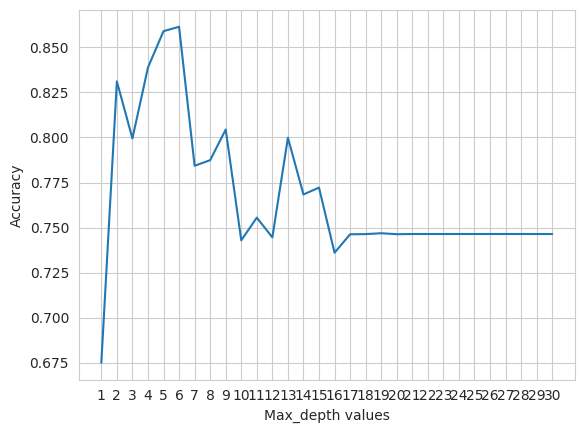

In [ ]:
# Getting the score of each depth with max_depth=1, max_dept=2 and so on.
pruned_depths = range(1,regressor.tree_.max_depth+1) # Range is from 1 to max_depth+1 (as the for loop starts from 0, this will ensure that we
# capture the scores at each depth till the max depth is reached).

pruned_scores = [] # Initiating a blank list to store scores at each depth.
# Iterating through 1 to max_depth+1 to get the scores at each depth.
for d in pruned_depths:
  rg = DecisionTreeRegressor(max_depth=d, random_state=0) # Creating an instance in DecisionTreeRregressor class.
  rg.fit(X_train, y_train) # Fitting our training data in the DecisionTreeRegressor.
  score = rg.score(X_test, y_test) # Getting the score on our test data.
  pruned_scores.append(score) # Appending the score of current iteration to pruned_score list.

# Plotting the performance of the model at different prune depth.

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values") # Setting label for x axis.
plt.ylabel("Accuracy") # Setting label for y axis.
ax.xaxis.set_ticks(pruned_depths) # Setting ticks for x axis to pruned depths.
plt.show()

From the graph above we see that the score peaked at depth 7. Therefore, we will use this depth to create a new Decision Tree model and see if this improves the score.

In [ ]:
regressor_pruned = DecisionTreeRegressor(max_depth=6, random_state = 0) # creating an instance of Decision Tree Regressor class.
regressor_pruned.fit(X_train, y_train) # fitting training data to Decision Tree Regressor class.

DecisionTreeRegressor(max_depth=6, random_state=0)

In [ ]:
y_pred = regressor_pruned.predict(X_test) # Predicting on our test data.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # Calculating R Squared score.

0.8613399695838846

In [ ]:
mean_squared_error(y_test, y_pred) # Calculating Mean Squared Error (MSE).

502759.65097028424

In [ ]:
mean_absolute_error(y_test, y_pred) # Calculating Mean Absolute Error (MAE).

216.14852061477464

Indeed, we see almost 6% increase in R Squared score from unpruned to pruned tree. The MSE has also decreased and difference in MAE is negligible, which is good. Now we will proceed implementing the same method with Random Forest.

### Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)  # creating an instance of Random Forest Regressor class.
random_regressor.fit(X_train, np.ravel(y_train)) # fitting training data to Random Forest Regressor class.

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred_random = random_regressor.predict(X_test) # Predicting on our test data.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_random) # Calculating R Squared score.

0.8713640212166504

In [ ]:
mean_squared_error(y_test, y_pred_random) # Calculating Mean Squared Error (MSE).

466414.00266

In [ ]:
mean_absolute_error(y_test, y_pred_random) # Calculating Mean Absolute Error (MAE).

197.3934

We see that even without pruning Random Forrest provides a better R Squared score than a pruned Decision Tree. The improvement is almost 8%. Also, both MSE and MAE has decreased which is a good sign. So, we hope that after pruning, Random Forest will provide better results than this.

In [ ]:
random_max_depth = max((e.tree_.max_depth for e in random_regressor.estimators_)) # Calculating max depth the Random Forest Regressor model have reached.

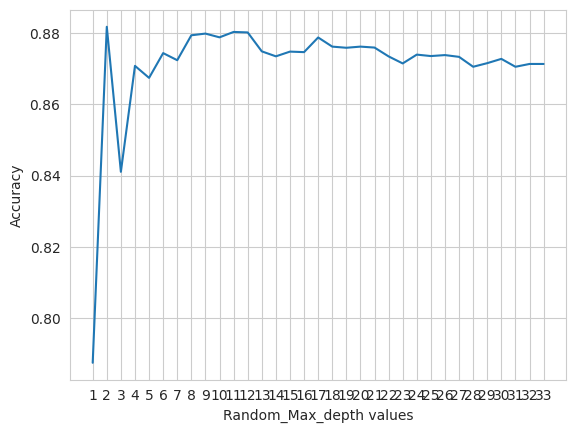

In [ ]:
random_pruned_depths = range(1, random_max_depth+1) # Setting random_pruned_depth as a range from 1 to random_max_depth+1 (as for loop starts from 0
# this will ensure that we get the score of each depth till the random_max_depth)

random_pruned_scores = [] # Initiating a blank list to store scores at each depth.

# Iterating through random_pruned_depth to get the score of the Random Forest Regressor model at
# each depth, starting from 1.
for d in random_pruned_depths:
  rrg = RandomForestRegressor(max_depth=d, n_estimators=10, random_state=0) # Creating an instance in Random Forest Regressor class.
  rrg.fit(X_train, np.ravel(y_train)) # Fitting our training data to the Random Forest Regressor class.
  random_score = rrg.score(X_test, y_test) # Getting score on test data.
  random_pruned_scores.append(random_score) # Adding the score to random_pruned_scores list.

# Plotting the performance of the model at different prune depth.

fig, ax = plt.subplots()
ax.plot(random_pruned_depths, random_pruned_scores)
plt.xlabel("Random_Max_depth values") # Setting label for x axis.
plt.ylabel("Accuracy") # Setting label for y axis.
ax.xaxis.set_ticks(random_pruned_depths)
plt.show()

From the graph above, it is little difficult to pinpoint the minimum depth where the model has reached the highest score. Therefore, we will use the index of random_pruned_depth where the random_pruned_scores was highest (using numpy's argmax) and setting that to the max_depth in the parameter of our pruned Random Forest model.

max_depth=random_pruned_depths[np.argmax(random_pruned_scores)]

In [ ]:
# creating an instance of Random Forest class.
pruned_random_regressor = RandomForestRegressor(max_depth=random_pruned_depths[np.argmax(random_pruned_scores)], n_estimators = 10, random_state = 0)
pruned_random_regressor.fit(X_train, np.ravel(y_train)) # fitting training data to Random Forest Regressor class.

RandomForestRegressor(max_depth=2, n_estimators=10, random_state=0)

In [ ]:
y_pred__pruned_random = pruned_random_regressor.predict(X_test) # Predicting on test data with pruned Random Forest Regressor.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred__pruned_random) # Calculating R Squared score.

0.881790318086354

In [ ]:
mean_squared_error(y_test, y_pred__pruned_random) # Calculating Mean Squared Error (MSE).

428609.8758370511

In [ ]:
mean_absolute_error(y_test, y_pred__pruned_random) # Calculating Mean Absolute Error (MAE).

280.7875371063818

Indeed, we see an improvement after pruning. Improvement in R Squared score is almost 4%. We also see a significant decrease in MSE and MAE error, which is good. We will now apply K-Fold Cross Validation to understand the bias and variance and will also implement Grid Search to tune the hyperparameters.

### Applying k-Fold Cross Validation

We're applying K-fold cross-validation to our dataset to ensure robust model evaluation. This technique splits our data into 'K' subsets, training the model 'K' times on different combinations of these subsets, and evaluating its performance on the remaining data each time. Our objectives are:

* **Better estimation of model performance:** K-fold cross-validation provides a more reliable estimate of how well the model will generalize to unseen data compared to a single train-test split.

* **Reduction of overfitting:** Overfitting occurs when a model memorizes the training data rather than generalizing from it. K-fold cross-validation helps mitigate this risk by training the model on different subsets of data, ensuring it doesn't become overly sensitive to any particular set of examples.

* **Utilization of all available data for training and testing:** K-fold cross-validation ensures that each data point is used for both training and testing exactly once across all folds, maximizing the use of the dataset for model training and evaluation.

In [ ]:
from sklearn.model_selection import cross_val_score

# Using cross-validation to evaluate the performance of a machine learning model.
# with k-fold cross-validation with k=10.
# This means the dataset will be split into 10 equal-sized folds, and the model will be trained
# and evaluated 10 times, each time using a different fold as the test set and the remaining
# folds as the training set.
accuracies = cross_val_score(estimator = random_regressor, X = X_train, y = np.ravel(y_train), cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Printing the mean accuracy as a percentage.
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # Printing the standard deviation of accuracies as a percentage.

Accuracy: 85.15 %
Standard Deviation: 6.40 %


With K- Fold Cross validation we see a high accuracy (74.49% is not exactly high accuracy but we have to keep in mind that this is mean of accuracies in all the folds we have, therefore considered to be high) but a high variance as well (standard deviation: 14.73%). This is problematic for us. A high variance means that the model's performance varies significantly across different subsets of the data. It can mean:

* **Inconsistency in Performance:** The model's accuracy varies notably when different subsets of data are used. It suggests that the model's performance is not stable and can be influenced by the specific data points.

* **Sensitivity to Data:** A high variance indicates that the model is sensitive to the particularities of the training data. Small changes in the training data can lead to significant variations in the model's performance.

Overall, a high standard deviation in K-fold cross-validation indicates that the model's performance is not stable across different data subsets and may require further refinement to improve its generalization ability.


### Applying Grid Search to find the model with best parameters

Next, we proceed with implementing a Grid Search to fine-tune the hyperparameters. Some key considerations in this step include:

* n_estimators Selection: I have determined the appropriate number of estimators after conducting experiments with different values on the pruned Random Forest Regressor model. Although some information on the internet suggests that we should start with 100 and go higher, I have found that two-digit numbers give better results in this case.

* Criterion for Split Quality:

  1. Squared Error: This criterion is opted for given our concern with high variance, making it suitable when aiming to minimize variance in predictions.

  2. Absolute Error: Chosen for its suitability in regression tasks, it can offer increased robustness to outliers compared to Squared Error.

  3. Friedman's Mean Squared Error: This criterion is selected considering the non-linear relationship observed between our features and target variables, as illustrated previously.

* max_depth selection: I have selected the max_depth as the optimum depth found through pruning Random Forest model above.


In [ ]:
random_pruned_depths[np.argmax(random_pruned_scores)]

2

In [ ]:
from sklearn.model_selection import GridSearchCV
# First, we will define a set of parameters for the grid search to work with.
parameters = [{'n_estimators': [10, 20, 30], 'criterion': ['squared_error','absolute_error', 'friedman_mse'],
               'max_depth': [2], 'bootstrap': [True]}]
# Creating an instance in our Grid Search class. Also, we are using 10 folds and neg_mean_absolute_error as scoring, for our search.
# Note that I have experimented with different scoring methods, and this gives best results.
grid_search = GridSearchCV(estimator = random_regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, np.ravel(y_train)) # Fitting the training data in our Grid Search.
best_parameters = grid_search.best_params_ # Finding out the best parameters.
print("Best Parameters:", best_parameters) # Printing the best parameters.

Best Parameters: {'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': 2, 'n_estimators': 20}


Now we will create our final Random Forest Regressor model with the Best Parameters found during Grid Search and see if our model's performance improves.

Please note that even though grid search suggests best n_estimators as 30, I have got better results with just 10. Therefore, we are only using 10 n_estimators in our final model.

In [ ]:
# creating an instance of Random Forest class
final_random_regressor = RandomForestRegressor(max_depth=random_pruned_depths[np.argmax(random_pruned_scores)], n_estimators = 20, criterion='squared_error', bootstrap=True, random_state = 0)
final_random_regressor.fit(X_train, np.ravel(y_train)) # fitting  training data to Random Forest Regressor class.

RandomForestRegressor(max_depth=2, n_estimators=20, random_state=0)

In [ ]:
y_pred__final_random = final_random_regressor.predict(X_test) # Predicting on test data.

In [ ]:
r2_score(y_test, y_pred__final_random) # Calculating R Squared score.

0.8843387020279025

In [ ]:
mean_squared_error(y_test, y_pred__final_random) # Calculating Mean Squared Error (MSE).

419369.8329988497

In [ ]:
mean_absolute_error(y_test, y_pred__final_random) # Calculating Mean Absolute Error (MAE).

277.6376830314281

Undoubtedly, there's a noticeable enhancement in our model's performance post-Grid Search compared to the pruned Random Forest model. We've observed an improvement of approximately 6% in R Squared score, reaching above 92%. This is a very good score for a Machine Learning model considering that our dataset is not that big. We also see a significant decrease in MSE and MAE error.

This promising outcome motivates us to transition to the next phase, where we'll explore Artificial Neural Network (ANN) for the same regression task using the same dataset. Please find the link for the ANN project below:

Artificial Neural Network Project: https://github.com/sumit-biswas-uk/Amazon-UK-Grocery-Dataset-Artificial-Neural-Network-ANN-Project                 

